# 1. &nbsp; Steady-state behavior & response type

Here, the steady-state behavior of previously studied networks is analyzed. We again consider the following network:

<div style="display: flex; justify-content: space-around;">
<div style="width: 30%;">

$$
\text{Rate equation scheme}
$$

$$
\begin{align*}
\xrightarrow{\overset{S}{\Big\downarrow} k_1} R \xrightarrow{k_2}
\end{align*}
$$

</div>
<div style="width: 60%;">

$$
\text{System of ODEs}
$$

$$
\begin{align*}
\dot{[R]} = k_0 + k_1 [S] - k_2 [R]
\end{align*}
$$

</div>
</div>

The network was previously simulated with the initial condition $R(0) = 0$ and a signal strength $S = 2.5$, as well as the parameter values $k_1 = 0.01$ and $k_2 = 1$.

Now, we analyze how the steady state value of the response $R$ depends on the signal $S$ and what type of response this is. The results are derived algebraically and graphically, as well as confirmed numerically via simulation (using the aforementioned parameter values).

In steady state, $\dot{[R]}_{SS} = 0$, leading to the following equation:

$$
\frac{d R}{d t}= k_0 + k_1 S - k_2 R = 0 \quad \Rightarrow \quad R_{SS} = \frac{k_0 + k_1 S}{k_2}
$$

Here, we can see that the only variable is $S$ and that the response $R$ changes linearly with its concentration if the system is in steady state. Thus, the type of response is linear.

To show this graphically, we can simulate the system and plot the steady state $R_{SS}$ against different signal strengths:

In [1]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [ ]:
# FIGURE INITIALIZATION
fig = plt.figure(figsize=(12, 6), dpi=300)
gs = plt.GridSpec(1, 1)

# GENERAL PARAMETERS
t_span = [0, 15]  # time span
t_eval = np.linspace(*t_span, 1500)  # time points for plotting

In [ ]:
# INITIAL CONDITION
S_0 = np.linspace(0, 5, 10)
R_0 = 0  # signal, response

k_p = 0  # constitutive production rate (assumed to be 0 here)
k_1 = 0.01  # signal-dependent production rate
k_2 = 1  # decay rate

p = [k_p, k_1, k_2]  # parameters

def ode(t, y, k_p, k_1, k_2):
    dydt = np.array([
        0,
        k_p + k_1 * y[0] - k_2 * y[1],
    ])
    return dydt

R_SS = np.zeros_like(S_0)  # to save a final R value for each S

# Solve with varying signal strength:
for i, S in enumerate(S_0):
    y0 = [S, R_0]  # use different concentration of S each time
    results = solve_ivp(ode, t_span, y0, t_eval=t_eval, args=p)
    R_SS[i] = results.y[1, -1]  # get final value of R for current signal

ax = fig.add_subplot(gs[0, 0])
ax.plot(S_0, R_SS, "-o", label="$R_{SS}$")
ax.set_title("Signal-dependent response curve (varied signal concentration)")
ax.set_xlabel("Constant signal concentration $S$")
ax.set_ylabel("Steady-state response concentration $R_{SS}$")
ax.legend()

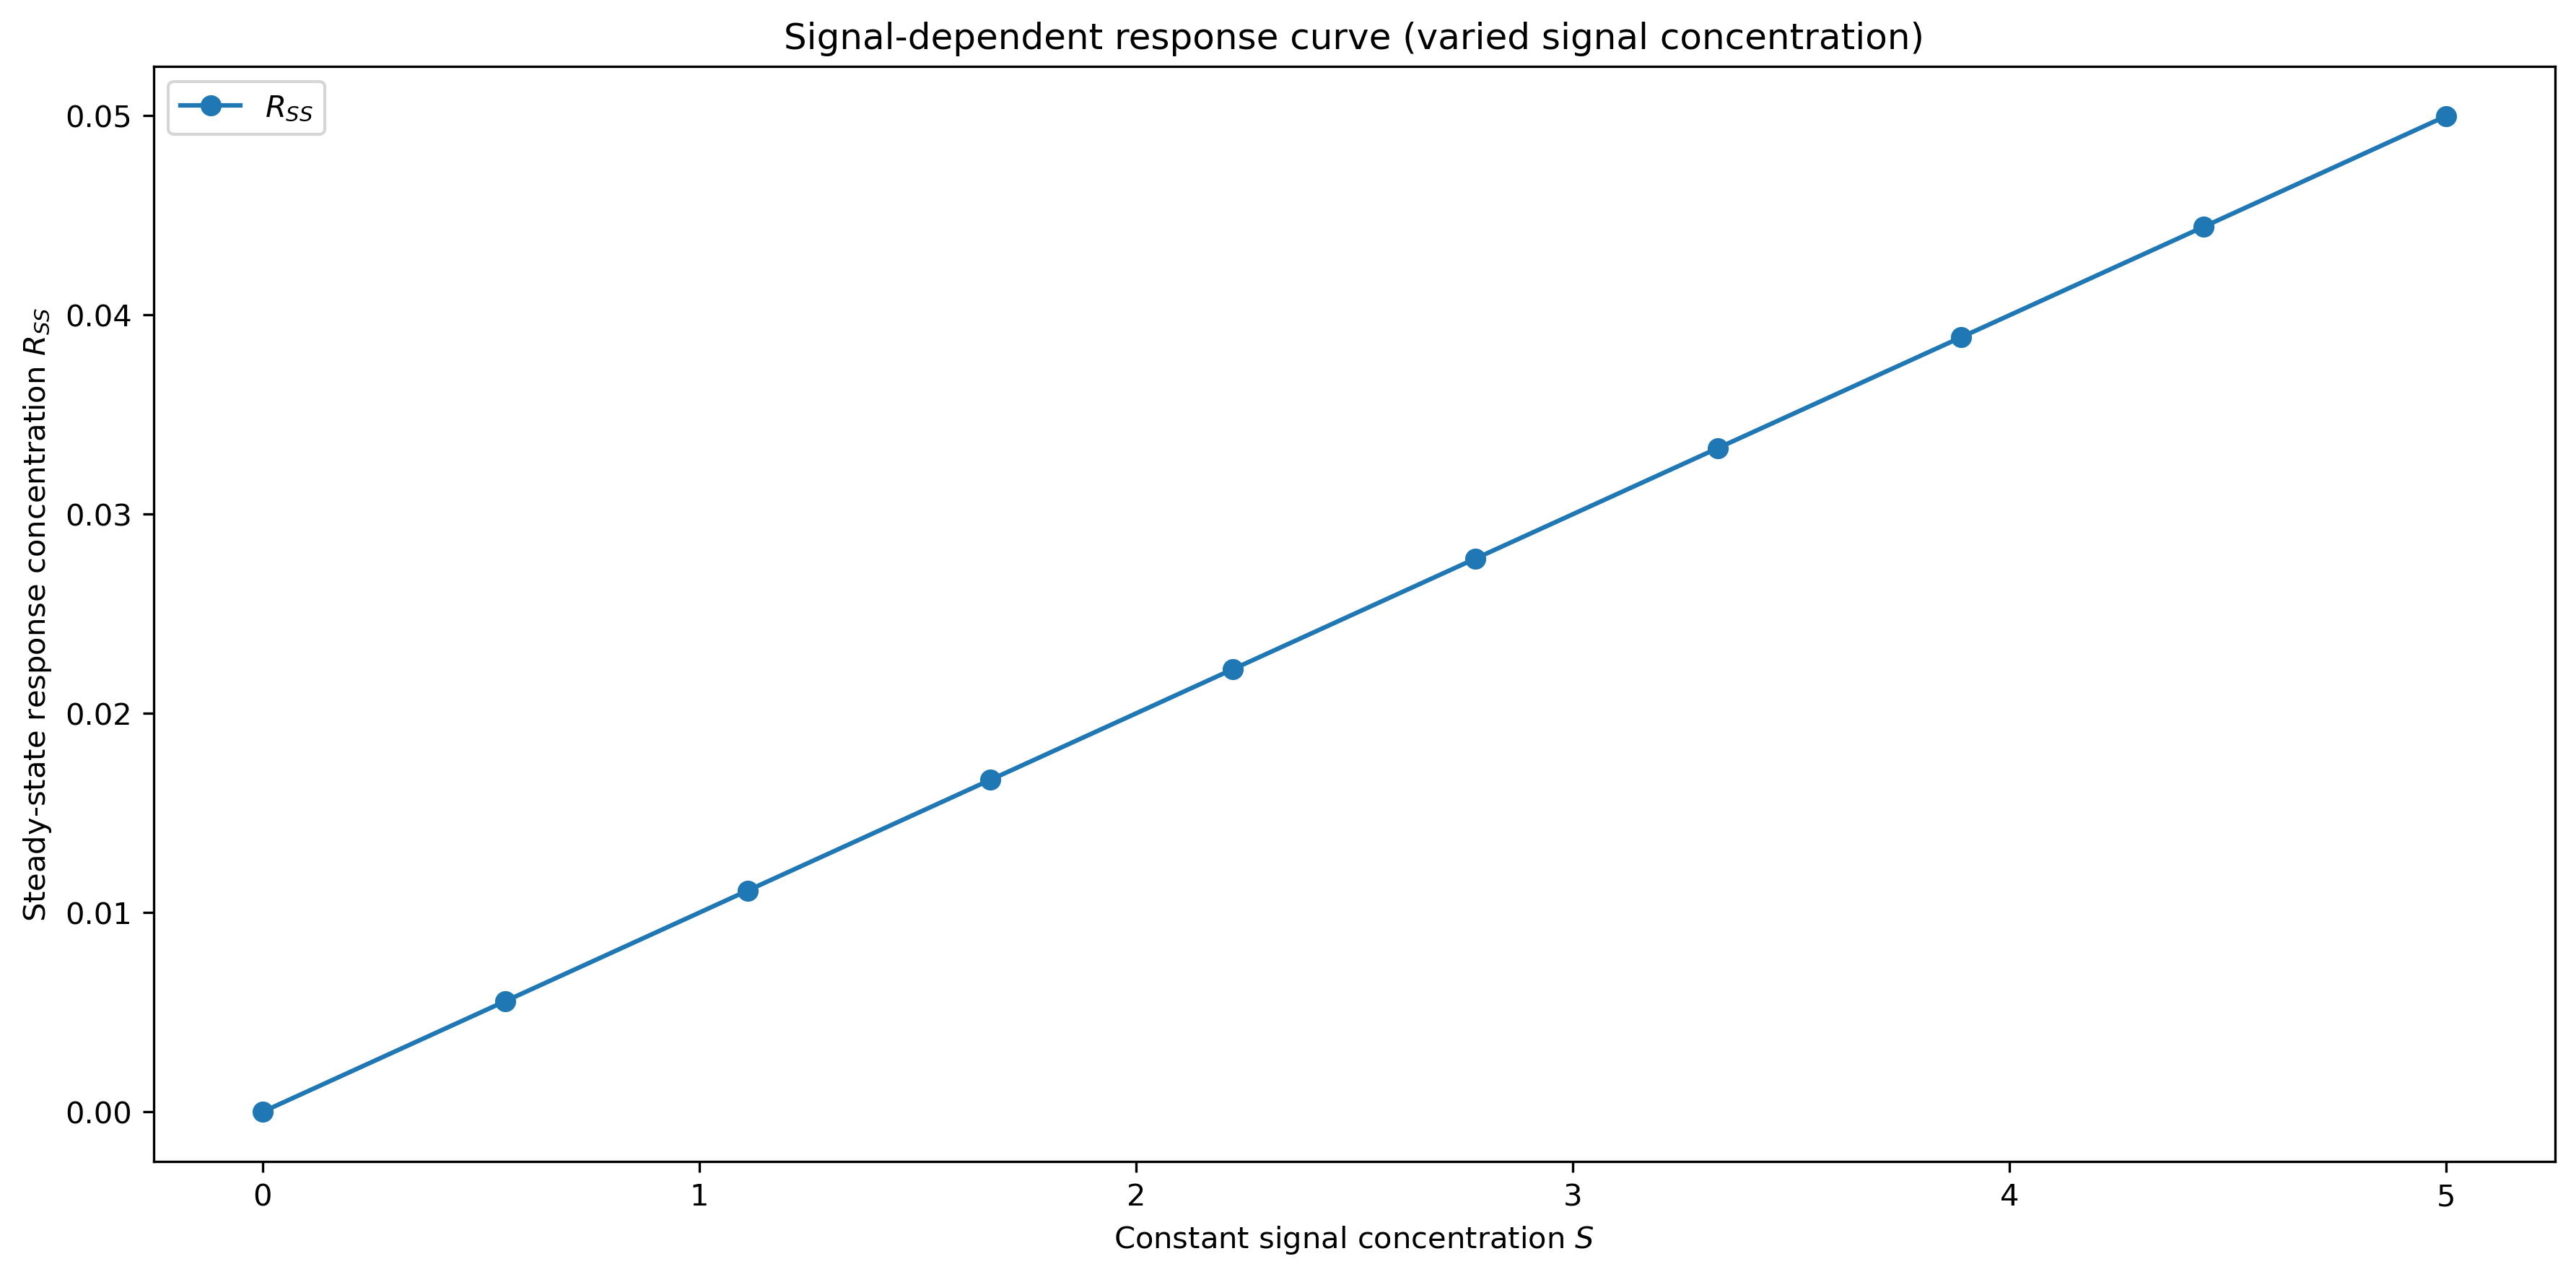

In [4]:
# PLOT THE FIGURE
fig.tight_layout()
fig